In [3]:
import fnmatch
import librosa
import numpy as np
import os

import sys
sys.path.append('..')

from config import data_path, EVAL_DATA_PATHS

def find_files(directory, pattern, path=True):
    files = []
    for root, dirnames, filenames in os.walk(
        directory, followlinks=True):
        for filename in fnmatch.filter(filenames, pattern):
            if path:
                files.append(os.path.join(root, filename))
            else:
                files.append(filename)
    return files

Selected Audios

In [2]:
pieces = {}

path_maestro = '../hel_data/asap_maestro_eval_subset' # EVAL_DATA_PATHS['asap_maestro']['data_path']

# Bach - Fugue_bwv_848 (train)
filepath = sorted(find_files(f'{path_maestro}/train/Bach/Fugue/bwv_848/MiyashitaM01M_disklavier/', '*.wav'))[0]
pieces[1] = filepath

# Beethoven - Piano_Sonatas_18-4 (test)
filepath = sorted(find_files(f'{path_maestro}/train/Beethoven/Piano_Sonatas/21-1_no_repeat/Sladek02M_maestro/', '*.wav'))[0]
pieces[2] = filepath

# Chopin - Scherzos_31 (train)
filepath = sorted(find_files(f'{path_maestro}/train/Chopin/Scherzos/31/Jussow11M_disklavier/', '*.wav'))[0]
pieces[3] = filepath

# Liszt - Transcendental_Etudes_11 (test)
filepath = sorted(find_files(f'{path_maestro}/test/Liszt/Transcendental_Etudes/11/Huang18M_maestro/', '*.wav'))[0]
pieces[4] = filepath

# Rachmaninoff - Preludes_op_23_4 (train)
filepath = sorted(find_files(f'{path_maestro}/train/Rachmaninoff/Preludes_op_23/4/WuuE07M_disklavier', '*.wav'))[0]
pieces[5] = filepath

# Schubert - Piano_Sonatas_664-1 (test)
filepath = sorted(find_files(f'{path_maestro}/test/Schubert/Piano_Sonatas/664-1/KabuliL10M_disklavier', '*.wav'))[0]
pieces[6] = filepath

pieces

{1: '../hel_data/asap_maestro_eval_subset/train/Bach/Fugue/bwv_848/MiyashitaM01M_disklavier/MiyashitaM01M_disklavier.wav',
 2: '../hel_data/asap_maestro_eval_subset/train/Beethoven/Piano_Sonatas/21-1_no_repeat/Sladek02M_maestro/Sladek02M.wav',
 3: '../hel_data/asap_maestro_eval_subset/train/Chopin/Scherzos/31/Jussow11M_disklavier/Jussow11M_disklavier.wav',
 4: '../hel_data/asap_maestro_eval_subset/test/Liszt/Transcendental_Etudes/11/Huang18M_maestro/Huang18M.wav',
 5: '../hel_data/asap_maestro_eval_subset/train/Rachmaninoff/Preludes_op_23/4/WuuE07M_disklavier/WuuE07M_disklavier.wav',
 6: '../hel_data/asap_maestro_eval_subset/test/Schubert/Piano_Sonatas/664-1/KabuliL10M_disklavier/KabuliL10M_disklavier.wav',
 7: '../hel_data/batik_mozart_subset/kv332_1/batik_audio/kv332_1.wav'}

Selected Reverb IR Filters

In [3]:
# Run this to ssh-mount the IRF data folder:
#./mountswitch_irf.sh

irfs = {}

# 1) Short reverberation time: Genesis 6 Studio – Live Room Drum Set Up RT60@1kHz: 0.19s
filepath_irf = find_files('../hel_irf/openairlib/irfilters/genesis-6-studio-live-room-drum-set/b-format', 'snare_ir.wav')[0]
irfs[1] = filepath_irf

# 2) Medium reverberation time: Jack Lyons Concert Hall
filepath_irf = find_files('../hel_irf/openairlib/irfilters/jack-lyons-concert-hall-university-york/b-format', 'rir_jack_lyons_lp1_96k.wav')[0]
irfs[2] = filepath_irf

# 3) Long reverberation time: Terry’s Factory Warehouse
filepath_irf = find_files('../hel_irf/openairlib/irfilters/terrys-factory-warehouse/b-format', 'terrys_warehouse_b_format.wav')[0]
irfs[3] = filepath_irf

irfs


{1: '../hel_irf/openairlib/irfilters/genesis-6-studio-live-room-drum-set/b-format/snare_ir.wav',
 2: '../hel_irf/openairlib/irfilters/jack-lyons-concert-hall-university-york/b-format/rir_jack_lyons_lp1_96k.wav',
 3: '../hel_irf/openairlib/irfilters/terrys-factory-warehouse/b-format/terrys_warehouse_b_format.wav'}

Prototype: Applying Reverb

(110250,) (260190,) (370439,) (260190,) (149941,) (110250,)


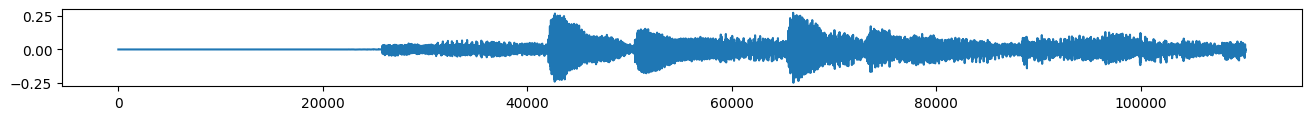

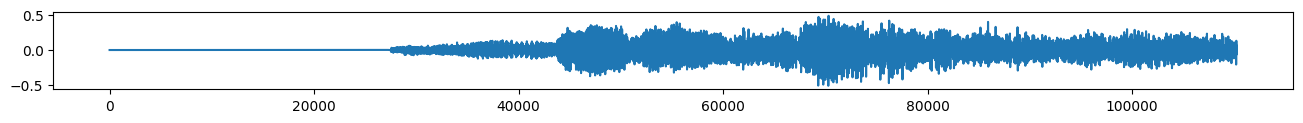

In [185]:
filepath_audio = pieces[7]
filepath_irf = irfs[3]

waveform_audio, fs_audio = librosa.load(filepath_audio)
waveform_irf, fs_irf = librosa.load(filepath_irf)

waveform_audio_5s = waveform_audio[:5*fs_audio] # extract first 5 seconds

waveform_reverberated_full = np.convolve(waveform_audio_5s, waveform_irf, mode='full')
waveform_reverberated_same = np.convolve(waveform_audio_5s, waveform_irf, mode='same')
waveform_reverberated_valid = np.convolve(waveform_audio_5s, waveform_irf, mode='valid')

waveform_audio_padded_front = np.pad(waveform_audio_5s, (len(waveform_irf)-1, 0), 'constant', constant_values=0)
waveform_reverberated_exact = np.convolve(waveform_audio_padded_front, waveform_irf, mode='valid')

print(
    waveform_audio_5s.shape, waveform_irf.shape,
    waveform_reverberated_full.shape, waveform_reverberated_same.shape,
    waveform_reverberated_valid.shape, waveform_reverberated_exact.shape
)

import IPython.display as ipd
ipd.display(ipd.Audio(waveform_irf, rate=fs_irf))
ipd.display(ipd.Audio(waveform_audio_5s, rate=fs_audio))
# ipd.display(ipd.Audio(waveform_reverberated_full, rate=fs_audio))
# ipd.display(ipd.Audio(waveform_reverberated_same, rate=fs_audio))
# ipd.display(ipd.Audio(waveform_reverberated_valid, rate=fs_audio))
ipd.display(ipd.Audio(waveform_reverberated_exact, rate=fs_audio))

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 1))
plt.plot(waveform_audio_5s)
plt.show()

plt.figure(figsize=(16, 1))
plt.plot(waveform_reverberated_exact)
plt.show()

In [34]:
def apply_impulse_response_filter(waveform_audio, waveform_irf):
    '''Applies IR filter to audio. Preserves timing of audio events.'''
    waveform_audio_padded_front = np.pad(waveform_audio, (len(waveform_irf)-1, 0), 'constant', constant_values=0)
    return np.convolve(waveform_audio_padded_front, waveform_irf, mode='valid')


def reverberate_audio(filepath_audio, filepath_irf):
    '''Reverberates audio with IRF.'''
    waveform_irf, fs_irf = librosa.load(filepath_irf)
    waveform_audio, fs_audio = librosa.load(filepath_audio)
    assert fs_audio == fs_irf
    waveform_reverberated = apply_impulse_response_filter(waveform_audio, waveform_irf)
    assert len(waveform_audio) == len(waveform_reverberated)
    return waveform_reverberated, fs_audio

#waveform_rev, fs_rev = reverberate_audio(filepath_audio, filepath_irf)

Prototype: Adding Noise

In [130]:
def synthesize_noise_waveform(size, beta=0.):
    '''Synthetic noise of spectral color given by `beta` parameter:
     * `beta = 0.` gives white noise,
     * `beta = 1.` gives pink noise, and
     * `beta = 2.` gives brown noise;
    according to Gaussian power law noise formula (1/f)**beta.
    '''
    from colorednoise import powerlaw_psd_gaussian
    return powerlaw_psd_gaussian(beta, size)

def normalize(data, low=-1, high=1):
    '''Normalizes audio waveform to the specified range.'''
    data -= np.min(data)
    data /= np.max(data)
    data *= (high-low)
    data += low
    return data

# Source: https://github.com/Sato-Kunihiko/audio-SNR/blob/master/create_mixed_audio_file_with_soundfile.py
# Reference: https://www.researchgate.net/post/How_do_I_set_the_signal_to_noise_ratio_at_different_levels_for_a_speech_in_noise_trial_with_two_channels_Left_and_right
def measure_snr(waveform_audio, waveform_noise):
    '''Measures SNR of audio with noise.'''
    signal_power = np.sum(waveform_audio**2)
    noise_power = np.sum(waveform_noise**2)
    snr = 10*np.log10(signal_power / noise_power)
    return snr

def cal_adjusted_rms(clean_rms, snr):
    a = float(snr) / 20
    noise_rms = clean_rms / (10 ** a)
    return noise_rms

def cal_rms(amp):
    return np.sqrt(np.mean(np.square(amp), axis=-1))

def mix_audio_with_noise(waveform_audio, waveform_noise, snr):
    audio_rms = cal_rms(waveform_audio)
    noise_rms = cal_rms(waveform_noise)
    adjusted_noise_rms = cal_adjusted_rms(audio_rms, snr)
    scaled_noise = waveform_noise * (adjusted_noise_rms / noise_rms)
    assert np.abs(measure_snr(waveform_audio, scaled_noise) - snr) < 1e-5
    return waveform_audio + scaled_noise

In [186]:
waveform_noise = normalize(synthesize_noise_waveform(len(waveform_audio_5s)))

# plt.figure(figsize=(16, 1))
# plt.hist(waveform_audio_5s, log=True, histtype='step', bins=100, alpha=0.8, label='audio')
# plt.hist(waveform_reverberated_exact, log=True, histtype='step', bins=100, alpha=0.8, label='reverberated')
# plt.hist(waveform_noise, log=True, histtype='step', bins=100, alpha=0.8, label='noise')
# plt.legend()

snr_levels = {1: 24, 2: 12, 3: 6} # [dB]

for snr_id, snr in snr_levels.items():
    mixed = mix_audio_with_noise(waveform_audio_5s, waveform_noise, snr)
    ipd.display(ipd.Audio(mixed, rate=fs_audio))
    print(snr_id, mixed.max(), mixed.min())

1 0.273548848867307 -0.2504963990705424


2 0.2773422833375366 -0.2614449824119323


3 0.2889951815143739 -0.28000349759003584


Generate Reverb+Noise Grid of Test Files

In [214]:
from tqdm import tqdm
import soundfile as sf

def compose_output_filename(piece_id, irf_id, snr_id, piece_name, irf_name, noise_snr):
    print(piece_id, irf_id, snr_id, piece_name, irf_name, noise_snr)
    filename = f'{piece_id}{irf_id}{snr_id}_piece_{piece_id}_reverb_{irf_id}_noise_{snr_id}_{piece_name}_{irf_name}_{noise_snr}'
    return filename

for piece_id, piece_filepath in tqdm(pieces.items()):
    piece_name = piece_filepath.split('/')[-1].split('.')[0].split('_')[0]
    
    wf_piece, sr_piece = librosa.load(piece_filepath)
    wf_noise = normalize(synthesize_noise_waveform(len(wf_piece)))
    output_filename = compose_output_filename(piece_id, 0, 0, piece_name, 'NOREV', 'NONOISE')
    sf.write(f'hel_data/revnoise/{output_filename}.wav', wf_piece, sr_piece)

    for snr_id, snr in snr_levels.items():
        wf_noisy = mix_audio_with_noise(wf_piece, wf_noise, snr)
        output_filename = compose_output_filename(piece_id, 0, snr_id, piece_name, 'NOREV', f'SNR{snr:02d}dB')
        sf.write(f'hel_data/revnoise/{output_filename}.wav', wf_noisy, sr_piece)

    for irf_id, irf_filepath in irfs.items():
        irf_name = irf_filepath.split('/')[-1].split('.')[0].split('_')[0]

        wf_rev, _ = reverberate_audio(piece_filepath, irf_filepath)
        output_filename = compose_output_filename(piece_id, irf_id, 0, piece_name, irf_name, 'NONOISE')
        sf.write(f'hel_data/revnoise/{output_filename}.wav', wf_rev, sr_piece)

        for snr_id, snr in snr_levels.items():
            wf_rev_noisy = mix_audio_with_noise(wf_rev, wf_noise, snr)
            output_filename = compose_output_filename(piece_id, irf_id, snr_id, piece_name, irf_name, f'SNR{snr:02d}dB')
            sf.write(f'hel_data/revnoise/{output_filename}.wav', wf_rev_noisy, sr_piece)

  0%|          | 0/7 [00:00<?, ?it/s]

1 0 0 MiyashitaM01M NOREV NONOISE
1 0 1 MiyashitaM01M NOREV SNR24dB
1 0 2 MiyashitaM01M NOREV SNR12dB
1 0 3 MiyashitaM01M NOREV SNR06dB
1 1 0 MiyashitaM01M snare NONOISE
1 1 1 MiyashitaM01M snare SNR24dB
1 1 2 MiyashitaM01M snare SNR12dB
1 1 3 MiyashitaM01M snare SNR06dB
1 2 0 MiyashitaM01M rir NONOISE
1 2 1 MiyashitaM01M rir SNR24dB
1 2 2 MiyashitaM01M rir SNR12dB
1 2 3 MiyashitaM01M rir SNR06dB
1 3 0 MiyashitaM01M terrys NONOISE
1 3 1 MiyashitaM01M terrys SNR24dB
1 3 2 MiyashitaM01M terrys SNR12dB
1 3 3 MiyashitaM01M terrys SNR06dB


 14%|█▍        | 1/7 [02:37<15:43, 157.18s/it]

2 0 0 Sladek02M NOREV NONOISE
2 0 1 Sladek02M NOREV SNR24dB
2 0 2 Sladek02M NOREV SNR12dB
2 0 3 Sladek02M NOREV SNR06dB
2 1 0 Sladek02M snare NONOISE
2 1 1 Sladek02M snare SNR24dB
2 1 2 Sladek02M snare SNR12dB
2 1 3 Sladek02M snare SNR06dB
2 2 0 Sladek02M rir NONOISE
2 2 1 Sladek02M rir SNR24dB
2 2 2 Sladek02M rir SNR12dB
2 2 3 Sladek02M rir SNR06dB
2 3 0 Sladek02M terrys NONOISE
2 3 1 Sladek02M terrys SNR24dB
2 3 2 Sladek02M terrys SNR12dB
2 3 3 Sladek02M terrys SNR06dB


 29%|██▊       | 2/7 [11:40<32:02, 384.54s/it]

3 0 0 Jussow11M NOREV NONOISE
3 0 1 Jussow11M NOREV SNR24dB
3 0 2 Jussow11M NOREV SNR12dB
3 0 3 Jussow11M NOREV SNR06dB
3 1 0 Jussow11M snare NONOISE
3 1 1 Jussow11M snare SNR24dB
3 1 2 Jussow11M snare SNR12dB
3 1 3 Jussow11M snare SNR06dB
3 2 0 Jussow11M rir NONOISE
3 2 1 Jussow11M rir SNR24dB
3 2 2 Jussow11M rir SNR12dB
3 2 3 Jussow11M rir SNR06dB
3 3 0 Jussow11M terrys NONOISE
3 3 1 Jussow11M terrys SNR24dB
3 3 2 Jussow11M terrys SNR12dB
3 3 3 Jussow11M terrys SNR06dB


 43%|████▎     | 3/7 [21:29<31:51, 477.85s/it]

4 0 0 Huang18M NOREV NONOISE
4 0 1 Huang18M NOREV SNR24dB
4 0 2 Huang18M NOREV SNR12dB
4 0 3 Huang18M NOREV SNR06dB
4 1 0 Huang18M snare NONOISE
4 1 1 Huang18M snare SNR24dB
4 1 2 Huang18M snare SNR12dB
4 1 3 Huang18M snare SNR06dB
4 2 0 Huang18M rir NONOISE
4 2 1 Huang18M rir SNR24dB
4 2 2 Huang18M rir SNR12dB
4 2 3 Huang18M rir SNR06dB
4 3 0 Huang18M terrys NONOISE
4 3 1 Huang18M terrys SNR24dB
4 3 2 Huang18M terrys SNR12dB
4 3 3 Huang18M terrys SNR06dB


 57%|█████▋    | 4/7 [31:52<26:45, 535.17s/it]

5 0 0 WuuE07M NOREV NONOISE
5 0 1 WuuE07M NOREV SNR24dB
5 0 2 WuuE07M NOREV SNR12dB
5 0 3 WuuE07M NOREV SNR06dB
5 1 0 WuuE07M snare NONOISE
5 1 1 WuuE07M snare SNR24dB
5 1 2 WuuE07M snare SNR12dB
5 1 3 WuuE07M snare SNR06dB
5 2 0 WuuE07M rir NONOISE
5 2 1 WuuE07M rir SNR24dB
5 2 2 WuuE07M rir SNR12dB
5 2 3 WuuE07M rir SNR06dB
5 3 0 WuuE07M terrys NONOISE
5 3 1 WuuE07M terrys SNR24dB
5 3 2 WuuE07M terrys SNR12dB
5 3 3 WuuE07M terrys SNR06dB


 71%|███████▏  | 5/7 [36:22<14:38, 439.42s/it]

6 0 0 KabuliL10M NOREV NONOISE
6 0 1 KabuliL10M NOREV SNR24dB
6 0 2 KabuliL10M NOREV SNR12dB
6 0 3 KabuliL10M NOREV SNR06dB
6 1 0 KabuliL10M snare NONOISE
6 1 1 KabuliL10M snare SNR24dB
6 1 2 KabuliL10M snare SNR12dB
6 1 3 KabuliL10M snare SNR06dB
6 2 0 KabuliL10M rir NONOISE
6 2 1 KabuliL10M rir SNR24dB
6 2 2 KabuliL10M rir SNR12dB
6 2 3 KabuliL10M rir SNR06dB
6 3 0 KabuliL10M terrys NONOISE
6 3 1 KabuliL10M terrys SNR24dB
6 3 2 KabuliL10M terrys SNR12dB
6 3 3 KabuliL10M terrys SNR06dB


 86%|████████▌ | 6/7 [41:57<06:43, 403.79s/it]

7 0 0 kv332 NOREV NONOISE
7 0 1 kv332 NOREV SNR24dB
7 0 2 kv332 NOREV SNR12dB
7 0 3 kv332 NOREV SNR06dB
7 1 0 kv332 snare NONOISE
7 1 1 kv332 snare SNR24dB
7 1 2 kv332 snare SNR12dB
7 1 3 kv332 snare SNR06dB
7 2 0 kv332 rir NONOISE
7 2 1 kv332 rir SNR24dB
7 2 2 kv332 rir SNR12dB
7 2 3 kv332 rir SNR06dB
7 3 0 kv332 terrys NONOISE
7 3 1 kv332 terrys SNR24dB
7 3 2 kv332 terrys SNR12dB
7 3 3 kv332 terrys SNR06dB


100%|██████████| 7/7 [48:06<00:00, 412.31s/it]


Create Symlinks to Labels

In [5]:
from pathlib import Path
from typing import Union


def relative_symlink(target: Union[Path, str], destination: Union[Path, str]):
    """Create a symlink pointing to ``target`` from ``location``.
    Args:
        target: The target of the symlink (the file/directory that is pointed to)
        destination: The location of the symlink itself.

    Source: https://gist.github.com/willprice/311faace6fb4f514376fa405d2220615
    """
    target = Path(target)
    destination = Path(destination)
    target_dir = destination.parent
    target_dir.mkdir(exist_ok=True, parents=True)
    relative_source = os.path.relpath(target, target_dir)
    dir_fd = os.open(str(target_dir.absolute()), os.O_RDONLY)
    print(f"{relative_source} -> {destination.name} in {target_dir}")
    try:
        os.symlink(relative_source, destination.name, dir_fd=dir_fd)
    finally:
        os.close(dir_fd)


def create_symlinks_to_labels(target, location):
    for ext in ['mid', 'match']:
        if os.path.exists(f'{location}.{ext}'):
            print(f'{location}.{ext} already exists. Skipping...')
        else:
            relative_symlink(f'{target}.{ext}', f'{location}.{ext}')


path_maestro = 'hel_data/asap_maestro_eval_subset' #'../asap_maestro_eval_subset'

# 1) Bach - Fugue_bwv_848 (train)
target = f'{path_maestro}/train/Bach/Fugue/bwv_848/MiyashitaM01M'
location = f'../hel_data/revnoise/1xx_piece_1_MiyashitaM01M'
create_symlinks_to_labels(target, location)

# 2) MISTAKENLY: Beethoven - Piano_Sonatas_21-1_no_repeat (train) [Pre-selected by Paty: Beethoven - Piano_Sonatas_18-4 (test)]
target = f'{path_maestro}/train/Beethoven/Piano_Sonatas/21-1_no_repeat/Sladek02M'
location = f'../hel_data/revnoise/2xx_piece_2_Sladek02M'
create_symlinks_to_labels(target, location)

# 3) Chopin - Scherzos_31 (train)
target = f'{path_maestro}/train/Chopin/Scherzos/31/Jussow11M'
location = f'../hel_data/revnoise/3xx_piece_3_Jussow11M'
create_symlinks_to_labels(target, location)

# 4) Liszt - Transcendental_Etudes_11 (test)
target = f'{path_maestro}/test/Liszt/Transcendental_Etudes/11/Huang18M'
location = f'../hel_data/revnoise/4xx_piece_4_Huang18M'
create_symlinks_to_labels(target, location)

# 5) Rachmaninoff - Preludes_op_23_4 (train)
target = f'{path_maestro}/train/Rachmaninoff/Preludes_op_23/4/WuuE07M'
location = f'../hel_data/revnoise/5xx_piece_5_WuuE07M'
create_symlinks_to_labels(target, location)

# 6) Schubert - Piano_Sonatas_664-1 (test)
target = f'{path_maestro}/test/Schubert/Piano_Sonatas/664-1/KabuliL10M'
location = f'../hel_data/revnoise/6xx_piece_6_KabuliL10M'
create_symlinks_to_labels(target, location)

# 7) kv332_1
target = f'{path_batikmo}/kv332_1/kv332_1'
location = f'../hel_data/revnoise/7xx_piece_7_kv332_1'
create_symlinks_to_labels(target, location)

../hel_data/revnoise/1xx_piece_1_MiyashitaM01M.mid already exists. Skipping...
../hel_data/revnoise/1xx_piece_1_MiyashitaM01M.match already exists. Skipping...
../hel_data/revnoise/2xx_piece_2_Sladek02M.mid already exists. Skipping...
../hel_data/revnoise/2xx_piece_2_Sladek02M.match already exists. Skipping...
../hel_data/revnoise/3xx_piece_3_Jussow11M.mid already exists. Skipping...
../hel_data/revnoise/3xx_piece_3_Jussow11M.match already exists. Skipping...
../hel_data/revnoise/4xx_piece_4_Huang18M.mid already exists. Skipping...
../hel_data/revnoise/4xx_piece_4_Huang18M.match already exists. Skipping...
../hel_data/revnoise/5xx_piece_5_WuuE07M.mid already exists. Skipping...
../hel_data/revnoise/5xx_piece_5_WuuE07M.match already exists. Skipping...
../hel_data/revnoise/6xx_piece_6_KabuliL10M.mid already exists. Skipping...
../hel_data/revnoise/6xx_piece_6_KabuliL10M.match already exists. Skipping...
../hel_data/revnoise/7xx_piece_7_kv332_1.mid already exists. Skipping...
../hel_data